# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

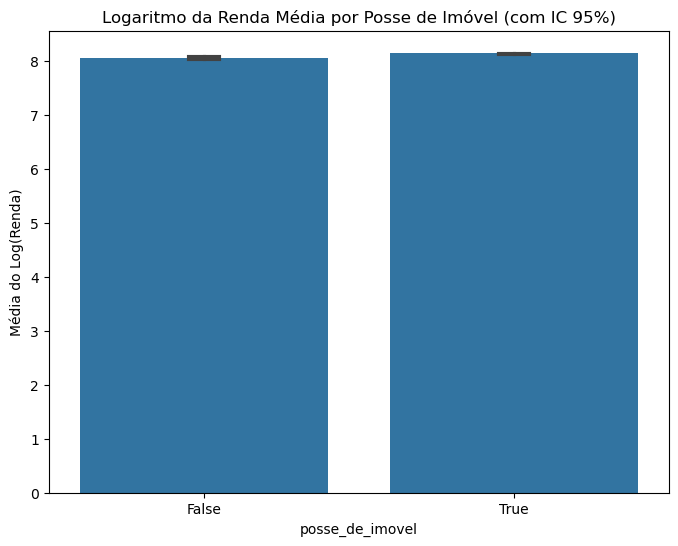

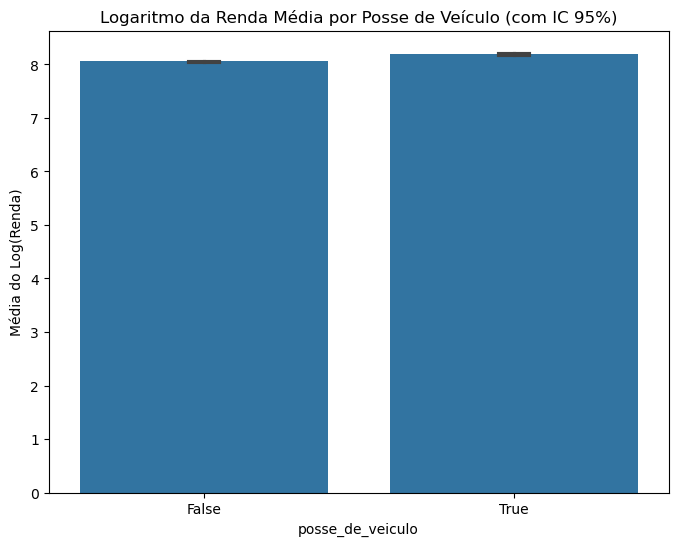

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Caminho completo do arquivo 
caminho_completo = r"C:\Users\NOTE\Downloads\Profissão Cientista de Dados M10 A1.csv.csv"
df = pd.read_csv(caminho_completo)

# Limpeza e transformação (Cálculo do logaritmo para corrigir a assimetria da renda)
df_clean = df.dropna(subset=['renda']).copy()
df_clean['log_renda'] = np.log(df_clean['renda'])
df_bivariada = df_clean[['log_renda', 'posse_de_imovel', 'posse_de_veiculo']]


# 1. ANÁLISE VISUAL: POSSE DE IMÓVEL
plt.figure(figsize=(8, 6))
sns.barplot(
    x='posse_de_imovel', 
    y='log_renda', 
    data=df_bivariada, 
    errorbar='ci', 
    capsize=0.1
)
plt.title('Logaritmo da Renda Média por Posse de Imóvel (com IC 95%)')
plt.ylabel('Média do Log(Renda)')
plt.show()

# 2. ANÁLISE VISUAL: POSSE DE VEÍCULO
plt.figure(figsize=(8, 6))
sns.barplot(
    x='posse_de_veiculo', 
    y='log_renda', 
    data=df_bivariada, 
    errorbar='ci', 
    capsize=0.1
)
plt.title('Logaritmo da Renda Média por Posse de Veículo (com IC 95%)')
plt.ylabel('Média do Log(Renda)')
plt.show()

In [3]:
from scipy import stats 

# Usando o caminho exato para evitar erros
caminho_completo = r"C:\Users\NOTE\Downloads\Profissão Cientista de Dados M10 A1.csv.csv"
df = pd.read_csv(caminho_completo)

# Limpeza e transformação (usando log_renda)
df_clean = df.dropna(subset=['renda']).copy()
df_clean['log_renda'] = np.log(df_clean['renda'])

# --- 1. FUNÇÃO PARA CALCULAR O INTERVALO DE CONFIANÇA ---
def calcula_ic(data):
    # n: Tamanho da amostra
    n = len(data)
    # std: Desvio Padrão
    std = data.std()
    # mean: Média
    mean = data.mean()
    
    # Erro Padrão (EP): EP = DP / sqrt(n)
    erro_padrao = std / np.sqrt(n)
    
    # Cálculo do IC 95%: usa a distribuição t de Student (mais rigorosa para amostras grandes)
    # stats.t.interval(nível_confiança, graus_liberdade, média, EP)
    ic_lower, ic_upper = stats.t.interval(0.95, n - 1, mean, erro_padrao)
    
    return pd.Series({
        'N': n,
        'Média Log(Renda)': mean,
        'Desvio Padrão': std,
        'Erro Padrão (EP)': erro_padrao,
        'IC 95% Inferior': ic_lower,
        'IC 95% Superior': ic_upper
    })


# --- 2. ANÁLISE PARA POSSE DE IMÓVEL ---
analise_imovel = df_clean.groupby('posse_de_imovel')['log_renda'].apply(calcula_ic)
print("--- ANÁLISE NUMÉRICA: POSSE DE IMÓVEL ---")
print(analise_imovel.unstack())

# --- 3. ANÁLISE PARA POSSE DE VEÍCULO ---
analise_veiculo = df_clean.groupby('posse_de_veiculo')['log_renda'].apply(calcula_ic)
print("\n--- ANÁLISE NUMÉRICA: POSSE DE VEÍCULO ---")
print(analise_veiculo.unstack())

--- ANÁLISE NUMÉRICA: POSSE DE IMÓVEL ---
                       N  Média Log(Renda)  Desvio Padrão  Erro Padrão (EP)  \
posse_de_imovel                                                               
False             4918.0          8.059330       0.804646          0.011474   
True             10082.0          8.136275       0.792735          0.007895   

                 IC 95% Inferior  IC 95% Superior  
posse_de_imovel                                    
False                   8.036836         8.081824  
True                    8.120799         8.151751  

--- ANÁLISE NUMÉRICA: POSSE DE VEÍCULO ---
                       N  Média Log(Renda)  Desvio Padrão  Erro Padrão (EP)  \
posse_de_veiculo                                                              
False             9167.0          8.053462       0.800664          0.008363   
True              5833.0          8.201547       0.783941          0.010264   

                  IC 95% Inferior  IC 95% Superior  
posse_de_veiculo   

Sim, ambas as variáveis (posse_de_imovel e posse_de_veiculo) discriminam a renda de forma estatisticamente significante.
A conclusão baseia-se na análise do Intervalo de Confiança de 95% (IC 95%), que atua como um teste de hipótese visual e numérico.

 A Compressão da Escala (Análise Visual):
 A primeira observação é a de que as barras nos gráficos de sns.barplot parecem ter alturas muito semelhantes. 
 Isso ocorre por dois motivos, que são na verdade indicadores de uma análise rigorosa:
 Transformação Logarítmica: A variável renda foi transformada usando o logaritmo ($\text{Log}(\text{Renda})$) para mitigar sua alta assimetria e o efeito de outliers. Essa transformação comprime a escala, reduzindo as distâncias visuais entre as médias.
 Foco na Estatística, Não na Prática: O objetivo é verificar a Significância Estatística (se a diferença é real na população), e não a Significância Prática (se a diferença é grande o suficiente para ser relevante economicamente).
 
 A Prova de Significância (O IC 95% e o Erro Padrão)
 Apesar da semelhança visual, a diferença é provada como real pela análise do Erro Padrão (EP) e dos Intervalos de Confiança (IC).
 
 O Erro Padrão mede o quão precisa é a nossa média amostral em relação à verdadeira média populacional. A fórmula $\text{EP} \propto 1/\sqrt{N}$ demonstra que o EP é extremamente baixo em nossa base de dados (que possui um $N$ grande, cerca de 15.000 observações).Um EP baixo resulta em Intervalos de Confiança muito estreitos, tornando o teste estatístico extremamente poderoso.3. Confirmação Numérica (A Não-Sobreposição)Os cálculos exatos dos ICs (95%) comprovam que não há sobreposição entre os grupos, o que é a condição necessária para a significância